In [1]:
import numpy as np
import pandas as pd
import graphviz
import pydotplus
from sklearn import tree
from sklearn.externals.six import StringIO
from graphviz import Digraph
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns # データ可視化ライブラリ
from sklearn.preprocessing import StandardScaler
from sklearn import svm
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
filename = 'd41d8cd9.xlsx'
alldata = pd.read_excel(filename)
alldata.columns

Index(['カテゴリー', '品種', 'ブロック', '株番号', '肥大部長(20%)', '肥大部長(思う長さ)', '肥大部長(1cmまで)',
       '最大幅', '最大幅20%', 'Unnamed: 9', '長幅比(20%)', '長幅比(思う)', '長幅比(1cm)',
       'Unnamed: 13', 'fit1(20%)', 'fit2(20%)', 'fit1(先端まで)', 'fit2(先端まで)',
       'Unnamed: 18', '最大幅位置', '膨らみの位置(20%)', '膨らみの位置(思う)', '膨らみの位置(1cm)',
       'Unnamed: 23', '首径', '膨らみの程度', 'Unnamed: 26', '幅の一定さ1', '幅の一定さ2',
       '膨らみの程度(5%)', '膨らみの程度(10%)', 'Unnamed: 31', '曲がり', 'Unnamed: 33',
       '5形質(幅の一定さ(方法1))', '6形質(膨らみの程度(10%)+幅の一定さ(方法1))', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40'],
      dtype='object')

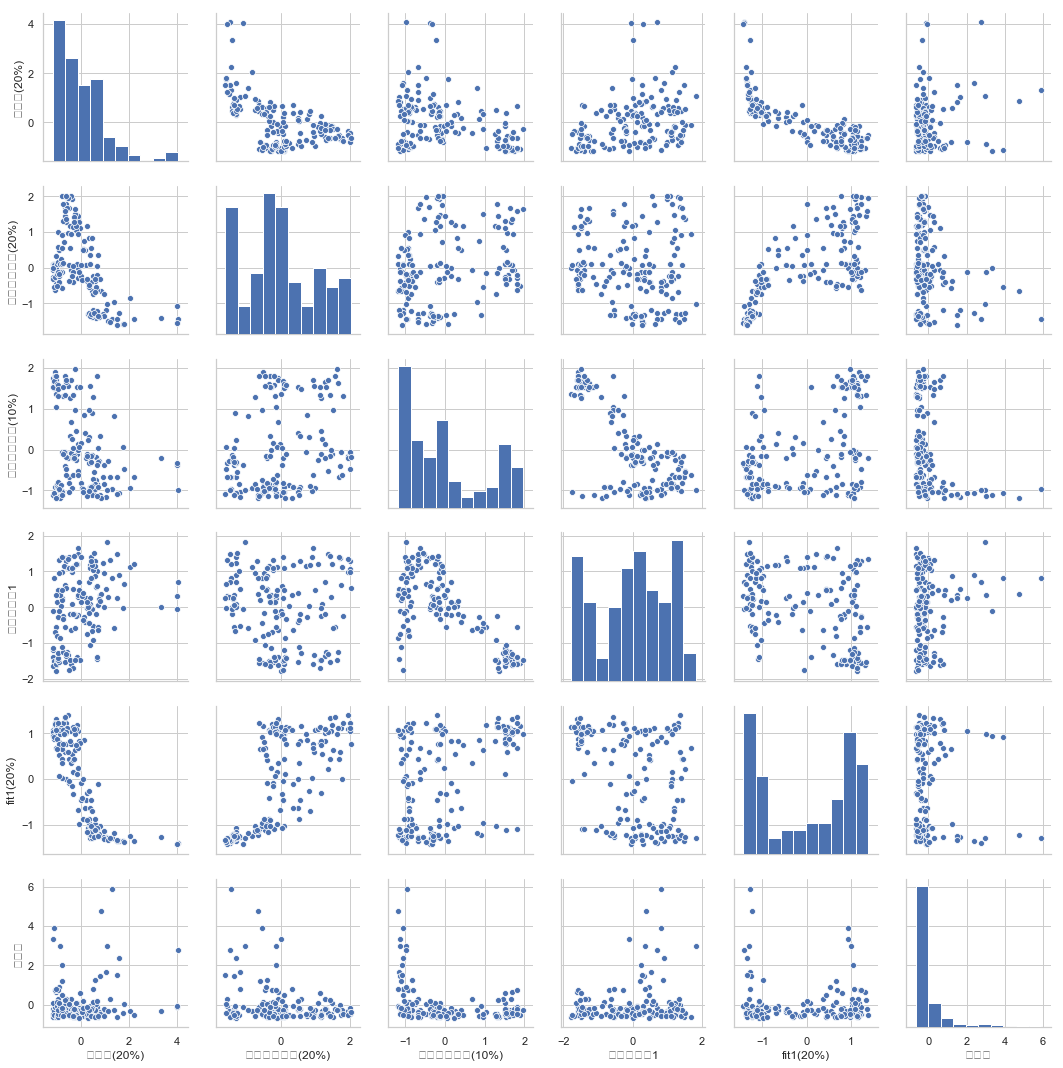

In [3]:
# 標準化
sc = StandardScaler()
cols = ['長幅比(20%)','膨らみの位置(20%)','膨らみの程度(10%)','幅の一定さ1','fit1(20%)','曲がり']
df = alldata[cols]

stddf = sc.fit_transform(df)

sns.set(style='whitegrid',context='notebook')
sns.pairplot(pd.DataFrame(data=stddf, columns=cols))
# plt.savefig('散布図行列HS.jpg')
plt.show()

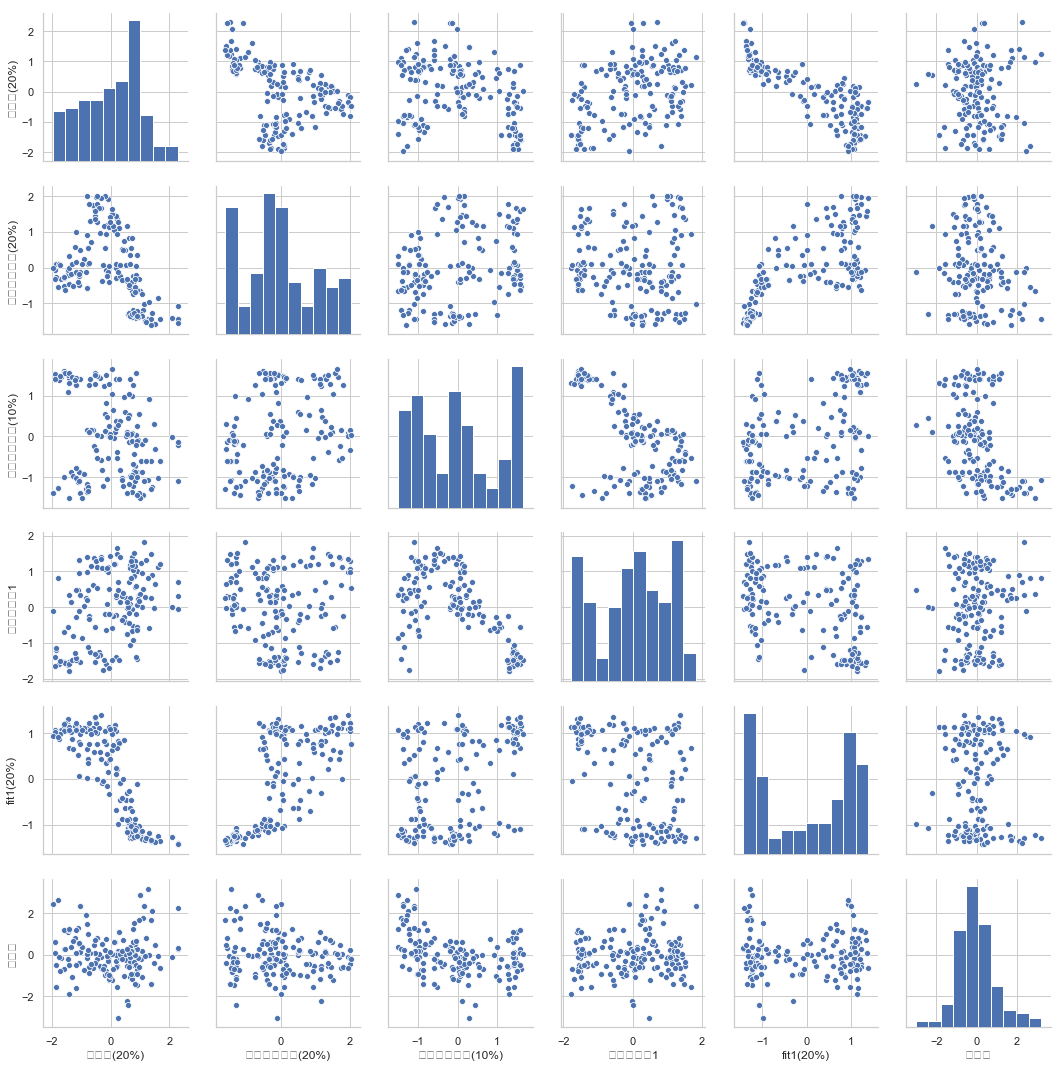

In [4]:
# 検討
# - 長幅比、膨らみの程度、幅の一定さは対数、、曲がりは４乗根で評価
df2 = df.copy()
df2['長幅比(20%)'] = np.log(df2['長幅比(20%)'])
df2['膨らみの程度(10%)'] = np.log(df2['膨らみの程度(10%)'])
# df2['幅の一定さ1'] = np.log(df2['幅の一定さ1'])
df2['曲がり'] = np.power(df2['曲がり'],1/4)

# 標準化
sc2 = StandardScaler()
stddf2 = sc2.fit_transform(df2)

sns.set(style='whitegrid',context='notebook')
sns.pairplot(pd.DataFrame(data=stddf2, columns=cols))
# plt.savefig('散布図行列HS.jpg')
plt.show()

In [5]:
# 線形識別 （素のデータを標準化したデータで）
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(solver='svd')
lda.fit(stddf, alldata['カテゴリー'])
allresult=lda.predict(stddf)
allresult

array(['だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま',
       '逆三角', 'だるま', 'だるま', 'だるま', '先流れ', '円筒', '楕円', '逆三角', '円筒', '円筒',
       '逆三角', '逆三角', '逆三角', '先流れ', '円筒', '円筒', '楕円', '丸', '円筒', '逆三角',
       '逆三角', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円',
       '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '丸', '丸', '横楕円',
       '角', '角', '角', '角', '角', '角', '角', '角', '角', '角', '角', '三角', '三角',
       '三角', '三角', '三角', '三角', '角', '丸', '丸', '横楕円', '円筒', '横楕円', '横楕円',
       '横楕円', '丸', '丸', '丸', '丸', '丸', '逆三角', '丸', '丸', '丸', '丸', '丸',
       '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '円筒',
       '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '円筒', 'だるま', '逆三角', '円筒', '三角',
       '三角', '先流れ', '三角', '三角', '三角', '三角', '三角', '三角', '三角', '三角', '三角',
       '三角', '三角', '三角', '三角', '角', '角', '先流れ', '先流れ', '先流れ', '先流れ',
       '先流れ', '先流れ', '先流れ', '三角', '先流れ', '先流れ', '先流れ', '先流れ', '先流れ',
       '先流れ', '先流れ', '先流れ', '先流れ', '先流れ', '楕円', '楕円', '楕円', '楕円', '楕円'

In [6]:
# 誤った判定結果があるかどうか？
print('誤り数',(alldata['カテゴリー']!=allresult).sum())

誤り数 39


In [7]:
# 線形識別　（対数、４乗根加工したデータを標準化したデータで）
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda2 = LDA(solver='svd')
lda2.fit(stddf2, alldata['カテゴリー'])
allresult2=lda2.predict(stddf2)
allresult2

array(['だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま',
       'だるま', 'だるま', 'だるま', '逆三角', '先流れ', '円筒', '先流れ', '逆三角', '円筒', '円筒',
       '逆三角', '逆三角', '逆三角', '先流れ', '円筒', '円筒', '楕円', '円筒', '円筒', '逆三角',
       '逆三角', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円',
       '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '丸', '丸', '横楕円',
       '角', '角', '角', '角', '角', '角', '角', '角', '角', '角', '角', '三角', '三角',
       '三角', '三角', '三角', '三角', '角', '丸', '丸', '横楕円', '横楕円', '横楕円', '横楕円',
       '横楕円', '丸', '丸', '丸', '丸', '丸', '丸', '丸', '丸', '丸', '丸', '丸',
       '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '円筒',
       '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '円筒', 'だるま', '逆三角', '円筒', '三角',
       '三角', '先流れ', '三角', '三角', '三角', '三角', '三角', '三角', '三角', '三角', '三角',
       '三角', '三角', '三角', '三角', '角', '角', '先流れ', '先流れ', '先流れ', '先流れ',
       '先流れ', '先流れ', '先流れ', '三角', '先流れ', '先流れ', '先流れ', '先流れ', '先流れ',
       '先流れ', '先流れ', '先流れ', '先流れ', '先流れ', '楕円', '先流れ', '楕円', '楕円', '楕

In [35]:
# 誤った判定結果があるかどうか？
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(alldata['カテゴリー'],allresult2))

Accuracy: 0.83


In [9]:
# サポートベクタマシン（素のデータを標準化したデータ, カーネル linear）
from sklearn import svm
svmclf= svm.SVC(kernel='linear', C=1, gamma=0.1)
svmclf.fit(stddf, alldata['カテゴリー'])
allresult=svmclf.predict(stddf)
allresult

array(['だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま',
       '逆三角', 'だるま', 'だるま', '逆三角', '円筒', '円筒', '円筒', '逆三角', '楕円', '逆三角',
       '逆三角', '逆三角', '逆三角', '円筒', '円筒', '円筒', '円筒', '円筒', '円筒', '逆三角',
       '逆三角', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円',
       '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '丸', '横楕円', '横楕円',
       '角', '角', '角', '角', '角', '角', '角', '角', '角', '角', '角', '三角', '三角',
       '三角', '三角', '三角', '三角', '角', '丸', '丸', '横楕円', '横楕円', '横楕円', '横楕円',
       '横楕円', '丸', '丸', '丸', '丸', '丸', '丸', '丸', '丸', '丸', '丸', '丸',
       '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角',
       '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '円筒', 'だるま', '逆三角', '逆三角', '三角',
       '三角', '先流れ', '三角', '三角', '三角', '三角', '三角', '三角', '三角', '三角', '三角',
       '三角', '三角', '三角', '三角', '三角', '角', '先流れ', '先流れ', '先流れ', '楕円',
       '先流れ', '先流れ', '先流れ', '三角', '先流れ', '先流れ', '先流れ', '先流れ', '先流れ',
       '先流れ', '先流れ', '先流れ', '先流れ', '先流れ', '楕円', '楕円', '楕円', '楕円', '

In [36]:
# 誤った判定結果があるかどうか？
print('誤り数',(alldata['カテゴリー']!=allresult).sum())
print('Accuracy: %.2f' % accuracy_score(alldata['カテゴリー'],allresult))

誤り数 18
Accuracy: 0.88


In [11]:
# サポートベクタマシン（素のデータを標準化したデータ, カーネル rbf）
from sklearn import svm
svmclf= svm.SVC(kernel='rbf', C=1, gamma=1)
svmclf.fit(stddf, alldata['カテゴリー'])
allresult=svmclf.predict(stddf)
allresult

array(['だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま',
       '逆三角', 'だるま', 'だるま', '円筒', '円筒', '円筒', '円筒', '円筒', '楕円', '円筒',
       '円筒', '円筒', '円筒', '円筒', '円筒', '円筒', '円筒', '円筒', '円筒', '逆三角', '逆三角',
       '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円',
       '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '丸', '横楕円', '横楕円', '角',
       '角', '角', '角', '角', '角', '角', '角', '角', '角', '角', '三角', '三角', '角',
       '角', '角', '角', '角', '丸', '丸', '横楕円', '丸', '横楕円', '横楕円', '丸', '丸',
       '丸', '丸', '丸', '丸', '丸', '丸', '丸', '丸', '丸', '丸', '逆三角', '逆三角',
       '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角',
       '逆三角', '逆三角', '円筒', '円筒', '逆三角', '円筒', '逆三角', '三角', '三角', '先流れ',
       '三角', '三角', '三角', '三角', '三角', '三角', '三角', '三角', '三角', '三角', '三角',
       '三角', '三角', '三角', '角', '先流れ', '先流れ', '先流れ', '楕円', '先流れ', '先流れ',
       '先流れ', '先流れ', '先流れ', '先流れ', '先流れ', '先流れ', '先流れ', '先流れ', '先流れ',
       '先流れ', '先流れ', '先流れ', '楕円', '楕円', '楕円', '楕円', '楕円', '楕円', '楕円'

In [37]:
# 誤った判定結果があるかどうか？
print('誤り数',(alldata['カテゴリー']!=allresult).sum())
print('Accuracy: %.2f' % accuracy_score(alldata['カテゴリー'],allresult))

誤り数 18
Accuracy: 0.88


In [38]:
# サポートベクタマシン（素のデータを標準化したデータ, カーネル rbf）
from sklearn import svm
svmclf= svm.SVC(kernel='rbf', C=1, gamma=10)
svmclf.fit(stddf, alldata['カテゴリー'])
allresult=svmclf.predict(stddf)
# 誤った判定結果があるかどうか？
print('誤り数',(alldata['カテゴリー']!=allresult).sum())
print('Accuracy: %.2f' % accuracy_score(alldata['カテゴリー'],allresult))

誤り数 0
Accuracy: 1.00


RBFのガンマを大きくすると識別面が複雑になるので当然結果はよくなる。

In [39]:
# サポートベクタマシン （対数、４乗根加工したデータを標準化したデータ, カーネル linear）
from sklearn import svm
svmclf2= svm.SVC(kernel='linear', C=1)
svmclf2.fit(stddf2, alldata['カテゴリー'])
allresult2=svmclf2.predict(stddf2)
allresult2
# 誤った判定結果があるかどうか？
print('誤り数',(alldata['カテゴリー']!=allresult2).sum())
print('Accuracy: %.2f' % accuracy_score(alldata['カテゴリー'],allresult2))

誤り数 27
Accuracy: 0.83


In [40]:
# サポートベクタマシン （対数、４乗根加工したデータを標準化したデータ, カーネル rbf）
from sklearn import svm
svmclf2= svm.SVC(kernel='rbf', C=1, gamma=1)
svmclf2.fit(stddf2, alldata['カテゴリー'])
allresult2=svmclf2.predict(stddf2)
allresult2
# 誤った判定結果があるかどうか？
print('誤り数',(alldata['カテゴリー']!=allresult2).sum())
print('Accuracy: %.2f' % accuracy_score(alldata['カテゴリー'],allresult2))

誤り数 13
Accuracy: 0.92


In [42]:
# サポートベクタマシンの最適化
tuned_parameters = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [10,1,0.1,0.01,0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
    ]
svmclf= GridSearchCV(svm.SVC(), tuned_parameters, cv=10, # 交差検定の回数
    scoring= 'accuracy' ) # モデルの評価関数の指定)
svmclf.fit(stddf, alldata['カテゴリー'])
allresult=svmclf.predict(stddf)
allresult

array(['だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま',
       'だるま', 'だるま', 'だるま', '逆三角', '円筒', '円筒', '円筒', '円筒', '円筒', '円筒',
       '円筒', '円筒', '円筒', '楕円', '円筒', '円筒', '円筒', '円筒', '円筒', '逆三角', '逆三角',
       '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円',
       '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '角',
       '角', '角', '角', '角', '角', '角', '角', '角', '角', '角', '三角', '角', '角',
       '角', '角', '三角', '角', '丸', '丸', '丸', '丸', '横楕円', '丸', '丸', '丸', '丸',
       '丸', '丸', '丸', '丸', '丸', '丸', '丸', '丸', '丸', '逆三角', '逆三角', '逆三角',
       '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角',
       '逆三角', '円筒', '円筒', 'だるま', '円筒', '逆三角', '三角', '三角', '先流れ', '三角',
       '三角', '三角', '三角', '三角', '三角', '三角', '三角', '三角', '三角', '三角', '三角',
       '角', '三角', '角', '先流れ', '先流れ', '先流れ', '楕円', '先流れ', '先流れ', '先流れ',
       '先流れ', '先流れ', '先流れ', '先流れ', '先流れ', '先流れ', '先流れ', '先流れ', '先流れ',
       '先流れ', '先流れ', '楕円', '楕円', '楕円', '楕円', '楕円', '楕円', '楕円', 

In [43]:
print(svmclf.best_estimator_)
err = my_custom_loss_func(allresult, alldata['カテゴリー']) 
print('誤り率 {:0.2f} %'.format(100*err))
print('Accuracy: %.2f' % accuracy_score(alldata['カテゴリー'],allresult))

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
誤り率 10.26 %
Accuracy: 0.90


In [45]:
# 誤った判定結果があるかどうか？
print('Accuracy: %.2f' % accuracy_score(alldata['カテゴリー'],allresult))
print('誤り数',(alldata['カテゴリー']!=allresult).sum())

Accuracy: 0.90
誤り数 16


In [47]:
# サポートベクタマシンの最適化
# stddf2 で
tuned_parameters = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [10,1,0.1,0.01,0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
    ]
svmclf2= GridSearchCV(svm.SVC(), tuned_parameters, cv=10, # 交差検定の回数
    scoring= 'accuracy') # モデルの評価関数の指定 'recall_macro'
svmclf2.fit(stddf2, alldata['カテゴリー'])
allresult2=svmclf2.predict(stddf2)
allresult2

array(['逆三角', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま', 'だるま',
       'だるま', 'だるま', 'だるま', '逆三角', '円筒', '円筒', '円筒', '逆三角', '楕円', '逆三角',
       '逆三角', '逆三角', '逆三角', '円筒', '円筒', '円筒', '円筒', '円筒', '円筒', '逆三角',
       '逆三角', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円',
       '横楕円', '横楕円', '横楕円', '丸', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円', '横楕円',
       '角', '角', '角', '角', '角', '角', '角', '角', '角', '角', '角', '三角', '三角',
       '三角', '三角', '三角', '三角', '角', '丸', '丸', '丸', '丸', '丸', '丸', '丸',
       '丸', '丸', '丸', '丸', '丸', '丸', '丸', '丸', '丸', '丸', '丸', '逆三角',
       '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角', '逆三角',
       '逆三角', '逆三角', '逆三角', '逆三角', '円筒', '逆三角', '逆三角', '逆三角', '三角', '三角',
       '先流れ', '三角', '三角', '三角', '三角', '三角', '三角', '三角', '三角', '三角', '三角',
       '三角', '三角', '三角', '三角', '角', '先流れ', '先流れ', '先流れ', '楕円', '先流れ',
       '先流れ', '先流れ', '三角', '先流れ', '先流れ', '先流れ', '先流れ', '先流れ', '先流れ',
       '先流れ', '先流れ', '先流れ', '先流れ', '楕円', '楕円', '楕円', '楕円', '楕円', '楕円',

In [48]:
print(svmclf2.best_estimator_)
print('Accuracy: %.2f' % accuracy_score(alldata['カテゴリー'],allresult2))
print('誤り率 {:0.2f} %'.format(100*my_custom_loss_func(allresult2, alldata['カテゴリー']) ))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy: 0.83
誤り率 17.31 %


In [50]:
# 誤った判定結果があるかどうか？
print('Accuracy: %.2f' % accuracy_score(alldata['カテゴリー'],allresult2))
print('誤り数',(alldata['カテゴリー']!=allresult2).sum())

Accuracy: 0.83
誤り数 27


# leave on out 

In [74]:
classifier = svm.SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

X = stddf
y = alldata['カテゴリー']

print("誤判定のケースだけ書き出し")
for i in range(len(y)):
    # １つ除いて SVC 識別器を作る
    classifier.fit(np.r_[X[0:i],X[i+1:]], pd.concat([y[0:i],y[i+1:]]))
    if y[i] != classifier.predict(X[i:i+1])[0]:
        print('{}  正解 {} - 判定 {}'.format(i,y[i],classifier.predict(X[i:i+1])[0]))

誤判定のケースだけ書き出し
0  正解 だるま - 判定 逆三角
9  正解 だるま - 判定 逆三角
12  正解 円筒 - 判定 逆三角
14  正解 円筒 - 判定 丸
17  正解 円筒 - 判定 楕円
19  正解 円筒 - 判定 逆三角
20  正解 円筒 - 判定 逆三角
21  正解 円筒 - 判定 逆三角
22  正解 円筒 - 判定 楕円
25  正解 円筒 - 判定 逆三角
28  正解 円筒 - 判定 逆三角
29  正解 円筒 - 判定 逆三角
30  正解 横楕円 - 判定 丸
41  正解 横楕円 - 判定 丸
45  正解 横楕円 - 判定 丸
59  正解 角 - 判定 三角
64  正解 角 - 判定 三角
65  正解 角 - 判定 先流れ
70  正解 丸 - 判定 横楕円
77  正解 丸 - 判定 横楕円
89  正解 逆三角 - 判定 円筒
90  正解 逆三角 - 判定 だるま
91  正解 逆三角 - 判定 円筒
97  正解 逆三角 - 判定 円筒
98  正解 逆三角 - 判定 円筒
99  正解 逆三角 - 判定 だるま
100  正解 逆三角 - 判定 円筒
101  正解 逆三角 - 判定 円筒
104  正解 三角 - 判定 先流れ
114  正解 三角 - 判定 角
117  正解 三角 - 判定 角
119  正解 三角 - 判定 角
123  正解 先流れ - 判定 楕円
127  正解 先流れ - 判定 三角
138  正解 楕円 - 判定 だるま
139  正解 楕円 - 判定 先流れ
145  正解 楕円 - 判定 丸
149  正解 楕円 - 判定 先流れ
153  正解 楕円 - 判定 円筒
154  正解 楕円 - 判定 丸
155  正解 楕円 - 判定 先流れ


In [78]:
classifier2 = svm.SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

X2 = stddf2
y = alldata['カテゴリー']

print("誤判定のケースだけ書き出し")
for i in range(len(y)):
    # １つ除いて SVC 識別器を作る
    classifier2.fit(np.r_[X2[0:i],X2[i+1:]], pd.concat([y[0:i],y[i+1:]]))
    if y[i] != classifier2.predict(X2[i:i+1])[0]:
        print('{}  正解 {} - 判定 {}'.format(i,y[i],classifier2.predict(X2[i:i+1])[0]))

誤判定のケースだけ書き出し
0  正解 だるま - 判定 逆三角
9  正解 だるま - 判定 逆三角
12  正解 円筒 - 判定 逆三角
16  正解 円筒 - 判定 逆三角
17  正解 円筒 - 判定 楕円
18  正解 円筒 - 判定 逆三角
19  正解 円筒 - 判定 逆三角
20  正解 円筒 - 判定 逆三角
21  正解 円筒 - 判定 逆三角
25  正解 円筒 - 判定 逆三角
28  正解 円筒 - 判定 逆三角
29  正解 円筒 - 判定 逆三角
41  正解 横楕円 - 判定 丸
45  正解 横楕円 - 判定 丸
52  正解 角 - 判定 先流れ
54  正解 角 - 判定 三角
57  正解 角 - 判定 三角
58  正解 角 - 判定 三角
59  正解 角 - 判定 三角
60  正解 角 - 判定 三角
61  正解 角 - 判定 三角
62  正解 角 - 判定 三角
63  正解 角 - 判定 三角
64  正解 角 - 判定 三角
65  正解 角 - 判定 先流れ
92  正解 逆三角 - 判定 だるま
98  正解 逆三角 - 判定 円筒
99  正解 逆三角 - 判定 だるま
101  正解 逆三角 - 判定 だるま
104  正解 三角 - 判定 先流れ
119  正解 三角 - 判定 角
122  正解 先流れ - 判定 角
123  正解 先流れ - 判定 楕円
127  正解 先流れ - 判定 三角
133  正解 先流れ - 判定 三角
138  正解 楕円 - 判定 だるま
145  正解 楕円 - 判定 丸
149  正解 楕円 - 判定 先流れ
153  正解 楕円 - 判定 円筒
154  正解 楕円 - 判定 丸
155  正解 楕円 - 判定 先流れ


In [ ]:
stddf, alldata['カテゴリー'])